# MovieLens Stream graph analysis

Timestamps have been shifted to $0$. The minimal timestamp was $789652004$ (January 9, 1995), and the last timestamp was $1427784002$ (March 31st, 2015). The total duration is $638131998$ seconds ($20.2$ years).

To build the stream, $\Delta$ is set to $24$ hours. We build $L=(T, M, U, E)$, with $T=[0,638088798]$, $|M|=26745$ movies, $|U|=138494$ users, and $|E|=20000264$ ratings.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_dist_ccdf(fname, func_dist="loglog", func_ccdf="loglog", title=""):
    """ Helper function to plot side by side a distribution and its cumulative; assumes files exist."""
    dist = pd.read_csv(fname + ".dist", sep=" ", header=None)
    ccdf = pd.read_csv(fname + ".ccdf", sep=" ", header=None)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
    
    if func_dist == "loglog":
        func_plot = ax1.loglog
    elif func_dist == "logx":
        func_plot = ax1.semilogx
    elif func_dist == "logy":
        func_plot = ax1.semilogy
    else:
        func_plot = ax1.plot
    func_plot(dist[0], dist[1])
    
    if func_ccdf == "loglog":
        func_plot = ax2.loglog
    elif func_ccdf == "logx":
        func_plot = ax2.semilogx
    elif func_ccdf == "logy":
        func_plot = ax2.semilogy
    else:
        func_plot = ax2.plot
    func_plot(ccdf[0], ccdf[1])
    
    plt.suptitle(title)
    
    plt.show()


## Ratings over time

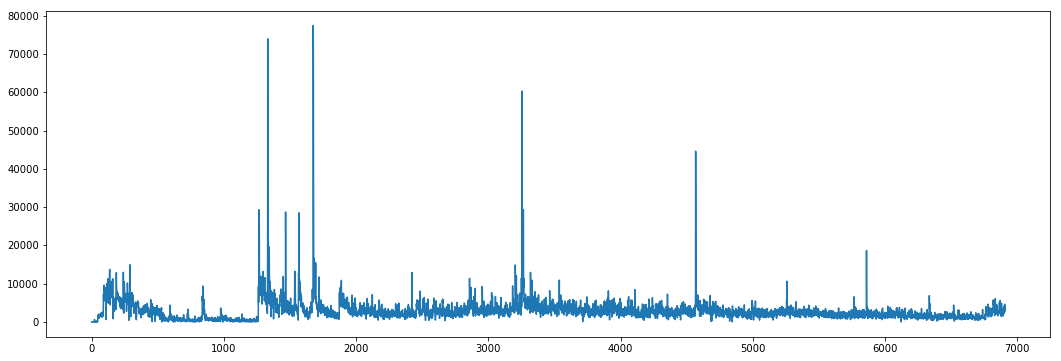

In [77]:
data = pd.read_csv("ratings-per-day", sep=" ")
plt.figure(figsize=(18,6))
plt.plot(data['ratings'])
plt.show()

Exhibits a base value (around $1000$ ratings/day, with regular peaks of activity)

## Ratings per user, per movie, etc.

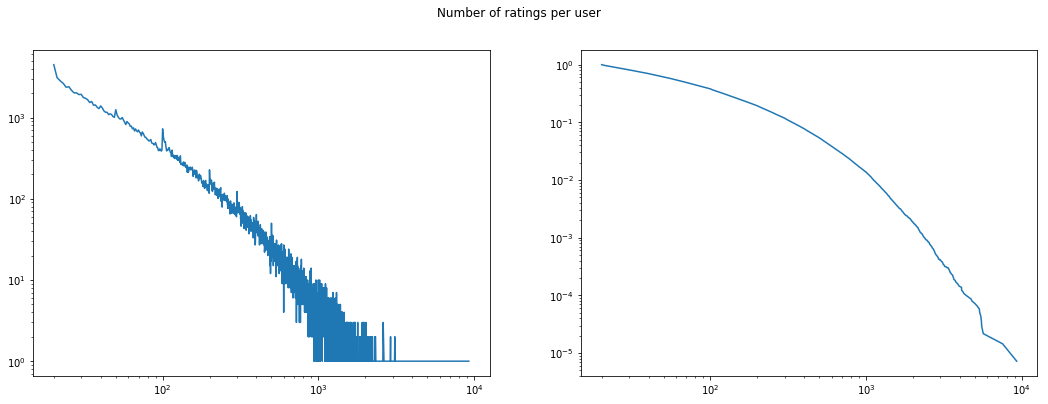

In [82]:
plot_dist_ccdf("ratings-per-user", title="Number of ratings per user")

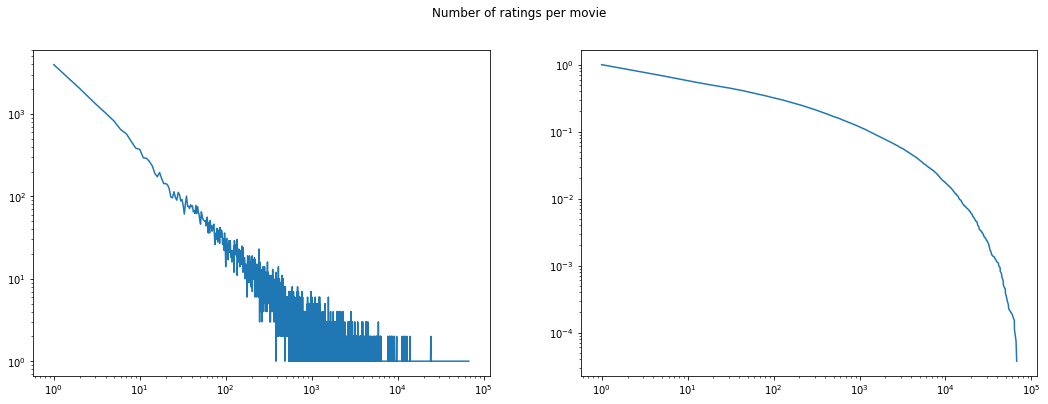

In [81]:
plot_dist_ccdf("ratings-per-movie", title="Number of ratings per movie")

The number of ratings per (user, movie) is always $1$ (each movie can only be rated once by a user). 

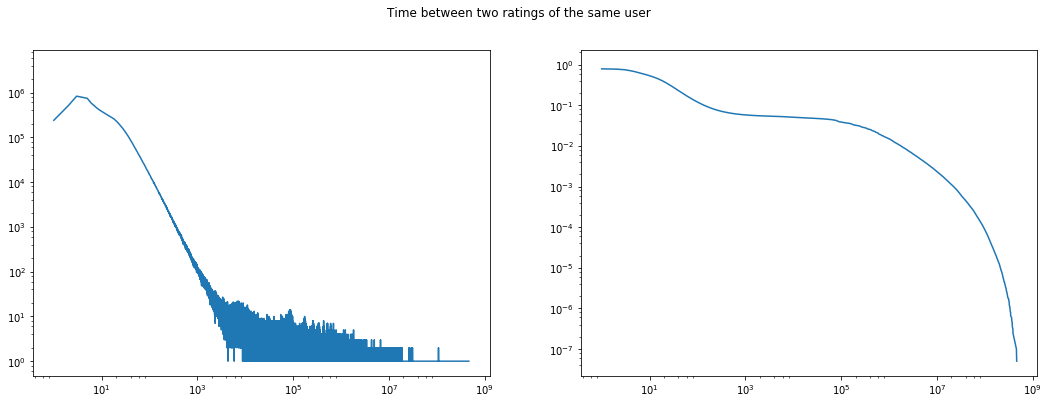

In [83]:
plot_dist_ccdf("interrating-user", title="Time between two ratings of the same user")

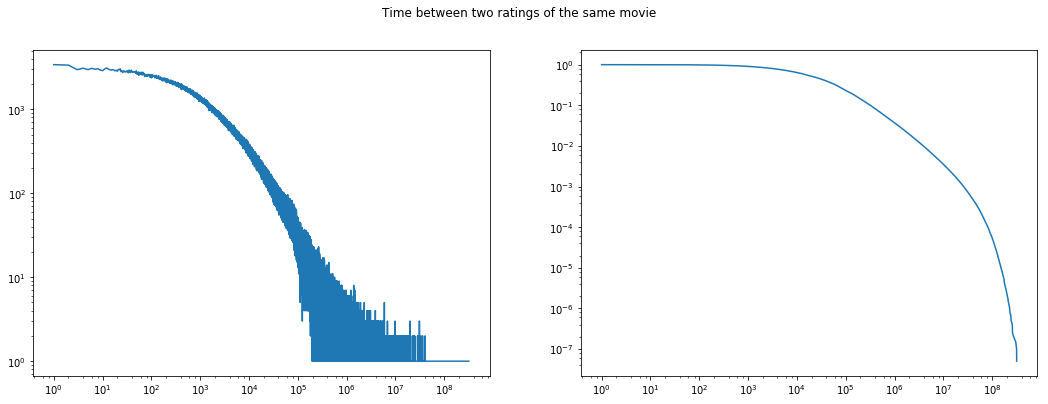

In [80]:
plot_dist_ccdf("interrating-movie", title="Time between two ratings of the same movie")

## Degrees

### Degrees in graph

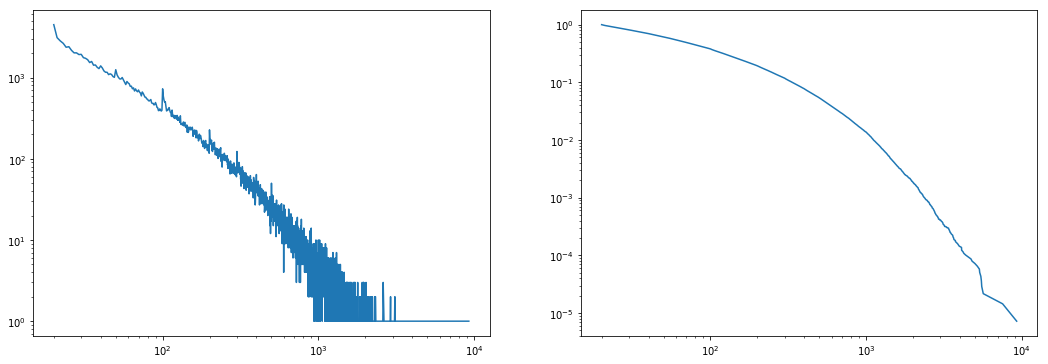

In [6]:
plot_dist_ccdf("graph-users-degrees", title="")

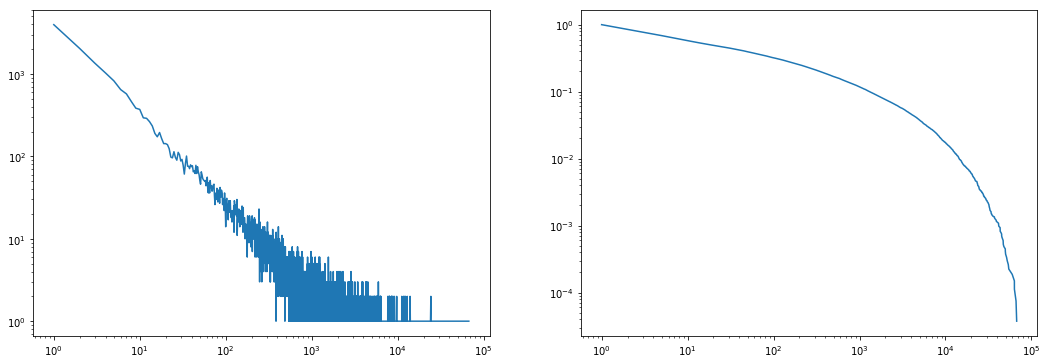

In [7]:
plot_dist_ccdf("graph-movies-degrees", title="")

Degrees in the stream are computed from two intermediary files, `pre-users-degrees.dat` and `pre-movies-degrees.dat` obtained as follows:
```bash
cat ../ml-20m/stream.csv|awk '{
        print($4, 1, $1);
        print($5, -1, $1);
    }'|sort -T. -S4g -k3,3g -k1,1g -k2,2g > ../ml-20m/pre-users-degrees.dat
```
This is necessary because users and movies share common IDs.

Then, degrees are computed with: 
```bash
cat ../ml-20m/pre-users-degrees.dat|python degrees.py
```

                 gdeg       avg       max  ml.min_itc  ml.max_itc  \
gdeg         1.000000  1.000000  0.920068   -0.040262   -0.156781   
avg          1.000000  1.000000  0.920068   -0.040262   -0.156781   
max          0.920068  0.920068  1.000000   -0.047350   -0.156932   
ml.min_itc  -0.040262 -0.040262 -0.047350    1.000000    0.216983   
ml.max_itc  -0.156781 -0.156781 -0.156932    0.216983    1.000000   
ml.mean_itc -0.119812 -0.119812 -0.131082    0.758145    0.631134   
ml.std_itc  -0.149339 -0.149339 -0.155171   -0.028269    0.846312   

             ml.mean_itc  ml.std_itc  
gdeg           -0.119812   -0.149339  
avg            -0.119812   -0.149339  
max            -0.131082   -0.155171  
ml.min_itc      0.758145   -0.028269  
ml.max_itc      0.631134    0.846312  
ml.mean_itc     1.000000    0.590444  
ml.std_itc      0.590444    1.000000  


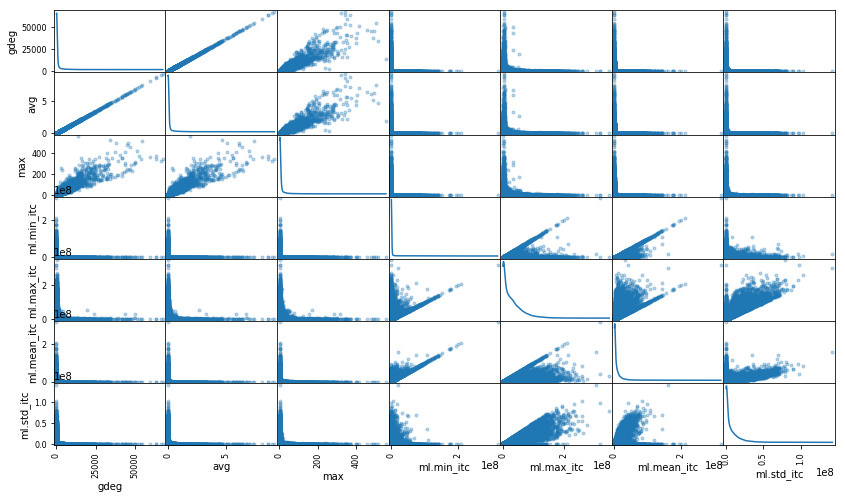

In [10]:
data = pd.read_csv("./data/movies.csv", sep=",", index_col=0)
print(data.corr())
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

              ml.gdeg    ml.avg    ml.max  ml.min_itc  ml.max_itc  \
ml.gdeg      1.000000  0.999987  0.757111   -0.003790    0.289830   
ml.avg       0.999987  1.000000  0.757084   -0.003790    0.289810   
ml.max       0.757111  0.757084  1.000000   -0.004913    0.148365   
ml.min_itc  -0.003790 -0.003790 -0.004913    1.000000   -0.001072   
ml.max_itc   0.289830  0.289810  0.148365   -0.001072    1.000000   
ml.mean_itc  0.057986  0.057981 -0.037848    0.003518    0.662731   
ml.std_itc   0.119067  0.119054  0.024721    0.000249    0.878493   

             ml.mean_itc  ml.std_itc  
ml.gdeg         0.057986    0.119067  
ml.avg          0.057981    0.119054  
ml.max         -0.037848    0.024721  
ml.min_itc      0.003518    0.000249  
ml.max_itc      0.662731    0.878493  
ml.mean_itc     1.000000    0.912431  
ml.std_itc      0.912431    1.000000  


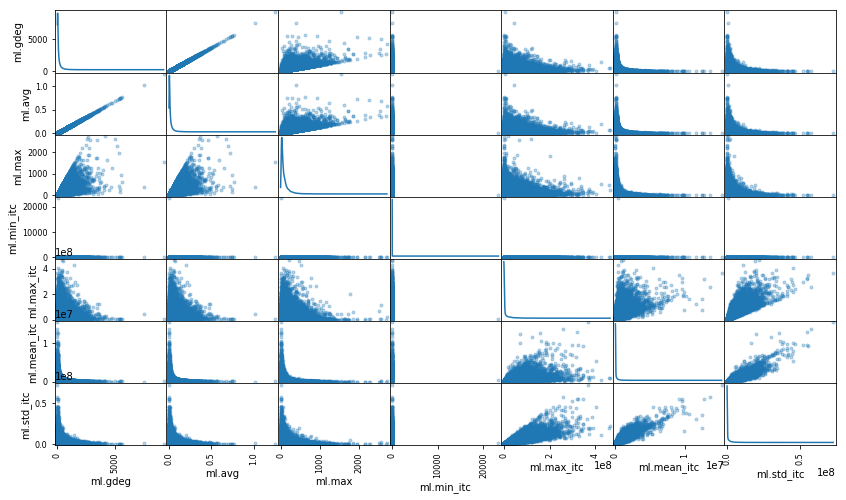

In [8]:
data = pd.read_csv("./data/users.csv", sep=",", index_col=0)
print(data.corr())
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()